In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
happiness = pd.read_csv('happiness_score_dataset.csv')

In [4]:
print(happiness.head())
print(happiness.columns)

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [5]:
#Finding missing values
print(happiness.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


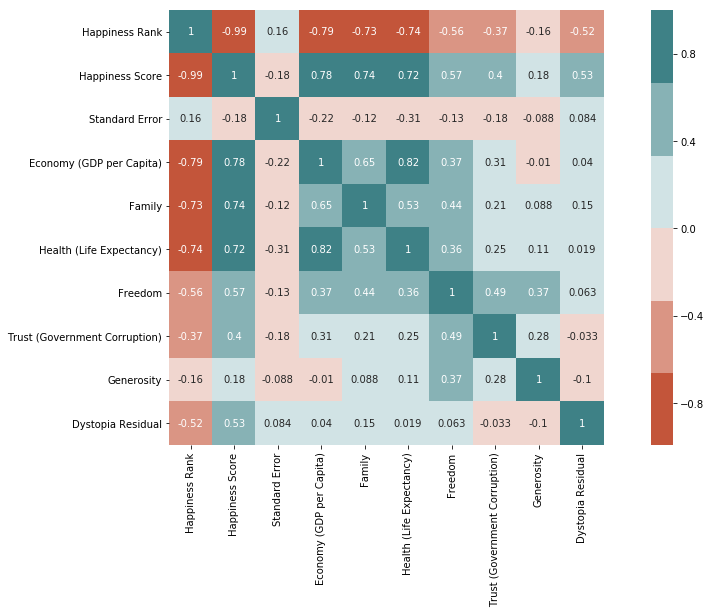

In [6]:
#Finding Correlation
plt.figure(figsize=(17,8))
sns.heatmap(happiness.corr(),square=True,annot=True,cmap=sns.diverging_palette(20,200))
plt.show()

From the heatmap, it is observed that strong positive correlation exist between 'GDP per capita' and 'Healthy life expectancy', with a value of 0.82.The target variable,'Happiness Score', has relatively high positive correlation with 'GDP per capita' of 0.78.The variables 'Healthy life expectancy' and 'Family' also contributes to a good correlation with the final variable,with a magnitude of 0.72 and 0.74 respectively.

Separating target and input variables

In [10]:
Y_variables = happiness['Happiness Score']
print(Y_variables.shape)
X_variables = happiness.drop(['Happiness Score','Country','Region','Happiness Rank'],axis=1)
print(X_variables.shape)

(158,)
(158, 8)


In [11]:
#Splitting dataset into test dataset and train
x_train,x_test,y_train,y_test = train_test_split(X_variables,Y_variables,test_size=0.25,random_state=0)

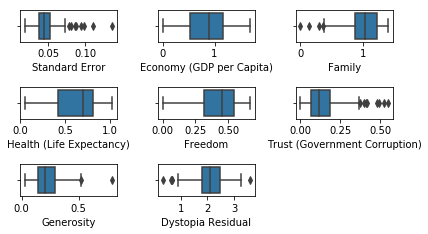

In [12]:
#Finding outliers
column_list=x_train.columns.values
for i in range(0,len(column_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x_train[column_list[i]])
    plt.tight_layout()

Since there shows outliers outside the whiskers,finding Z score of each variable to check if there are values outside the limit of +3 and -3.Also,the score value should vary between 0 and 10.

In [14]:
happiness['Zscore_GDP'] = stats.zscore(happiness['Economy (GDP per Capita)'])
print(happiness.query('Zscore_GDP > 3 | Zscore_GDP < -3'))

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual, Zscore_GDP]
Index: []


In [16]:
happiness['Zscore_Social'] = stats.zscore(happiness['Family'])
happiness.query('Zscore_Social > 3 | Zscore_Social < -3')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Zscore_GDP,Zscore_Social
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,-1.910291,-3.650183
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,-1.586334,-3.134725


In [17]:
happiness['Zscore_Healthy'] = stats.zscore(happiness['Health (Life Expectancy)'])
happiness.query('Zscore_Healthy > 3 | Zscore_Healthy < -3')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Zscore_GDP,Zscore_Social,Zscore_Healthy


In [18]:
happiness['Zscore_Freedom'] = stats.zscore(happiness['Freedom'])
happiness.query('Zscore_Freedom > 3 | Zscore_Freedom < -3')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Zscore_GDP,Zscore_Social,Zscore_Healthy,Zscore_Freedom


In [19]:
happiness['Zscore_Generosity'] = stats.zscore(happiness['Generosity'])
happiness.query('Zscore_Generosity > 3 | Zscore_Generosity < -3')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Zscore_GDP,Zscore_Social,Zscore_Healthy,Zscore_Freedom,Zscore_Generosity
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,-1.431049,-1.038637,-0.600092,0.076923,4.423262


In [23]:
happiness['Zscore_Trust'] = stats.zscore(happiness['Trust (Government Corruption)'])
happiness.query('Zscore_Trust > 3 | Zscore_Trust < -3')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Zscore_GDP,Zscore_Social,Zscore_Healthy,Zscore_Freedom,Zscore_Generosity,Zscore_Trust
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.0786,0.79733,0.64040,0.52208,0.32573,1.55674,2.101026,0.322476,0.678336,1.409878,0.700286,3.164619
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042,-1.552987,-0.800520,-0.818610,1.087740,-0.087228,3.413922


Linear regression

In [27]:
#Multiple Linear regression is choosen since 3 of these variables shown high correlation to the target variable,Score.

feature_cols=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'] #list(x_train.columns)
X = x_train[feature_cols]
happiness_model = LinearRegression()
happiness_model.fit(X,y_train)
print('Intercept : ',happiness_model.intercept_)
print('Coefficients : ')
list(zip(feature_cols,happiness_model.coef_))

Intercept :  2.1099837169997904
Coefficients : 


[('Economy (GDP per Capita)', 1.0923136708309948),
 ('Family', 1.71276708090127),
 ('Health (Life Expectancy)', 1.0100939693024158)]

In [28]:

Xtest= x_test[feature_cols]
y_pred = happiness_model.predict(Xtest)
print(y_pred)

[6.69256971 6.3589815  4.27519286 4.55833473 6.14593021 4.10761801
 3.79793168 4.0956897  4.84955614 5.57289906 6.12909438 4.62043737
 6.11253038 5.90298581 3.98950898 5.77040118 4.3174696  4.5738757
 5.2567301  5.464346   6.65229838 6.07881507 6.3177821  6.65339881
 6.08184662 6.24750262 5.85333926 6.41457634 4.30469347 3.89022948
 5.12278121 6.46834769 6.83542186 3.05993144 4.97597211 6.12958119
 4.05070916 5.89233232 5.42420325 5.26887296]


In [29]:

r2 = metrics.r2_score(y_test,y_pred)
print('R square : ',r2)

R square :  0.6061666202834688


In [30]:
# Calculating Adjusted rsquare to see if the added variable is relevant enough.

x=x_train[feature_cols]
k=len(x_train[feature_cols].columns)
n = x.size
adj2=1 -((1-r2)*(n-1)/(n-k-1))
print('Adjusted R square : ',adj2)

Adjusted R square :  0.6027909056001843


In [31]:
#Adding more columns to improve Rsquared value.

feature_cols2=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom'] 
X= x_train[feature_cols2]
happiness_model=LinearRegression()
happiness_model.fit(X,y_train)
print('Intercept : ',happiness_model.intercept_)
print('Coefficients : ')
list(zip(feature_cols2,happiness_model.coef_))

Intercept :  1.8005269269878754
Coefficients : 


[('Economy (GDP per Capita)', 1.030554758921062),
 ('Family', 1.368253169825576),
 ('Health (Life Expectancy)', 0.8871908593040186),
 ('Freedom', 1.831136521230297)]

In [32]:
#Predicting and evaluating

Xtest= x_test[feature_cols2]
y_pred = happiness_model.predict(Xtest)
r2 = metrics.r2_score(y_test,y_pred)
print('R square : ',r2)

# Calculating Adjusted rsquare
x=x_train[feature_cols2]
k=len(x_train[feature_cols2].columns)
n = x.size
adj2=1 -((1-r2)*(n-1)/(n-k-1))
print('Adjusted R square : ',adj2)

R square :  0.6505187638144976
Adjusted R square :  0.6475253485152641


In [33]:
#Since there is an increase in Adjusted r square,the added columns are not irrelavant.
#So,adding more columns to improve accuracy.

feature_cols3=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)' ] 
X= x_train[feature_cols3]
happiness_model=LinearRegression()
happiness_model.fit(X,y_train)
print('Intercept : ',happiness_model.intercept_)
print('Coefficients : ')
list(zip(feature_cols3,happiness_model.coef_))

Intercept :  1.804262853808006
Coefficients : 


[('Economy (GDP per Capita)', 0.9683977841028515),
 ('Family', 1.4014039168096222),
 ('Health (Life Expectancy)', 0.9246857418839228),
 ('Freedom', 1.5969251718081994),
 ('Trust (Government Corruption)', 0.6223386751682736)]

In [34]:
#Predicting and evaluating
Xtest = x_test[feature_cols3]
y_pred = happiness_model.predict(Xtest)
r2 = metrics.r2_score(y_test,y_pred)
print('R square : ',r2)

#Calculating Adjusted rsquare
x=x_train[feature_cols3]
k=len(x_train[feature_cols3].columns)
n = x.size
adj2=1 -((1-r2)*(n-1)/(n-k-1))
print('Adjusted R square : ',adj2)

R square :  0.6667440312778239
Adjusted R square :  0.6638908123675313


Random Forest

In [35]:
RFmodel = RandomForestRegressor()
RFmodel.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
#Predicting and evaluating

y_predRF= RFmodel.predict(x_test)
r2 = metrics.r2_score(y_test,y_predRF)
print('R square : ',r2)

R square :  0.9224289301950859


Here, the rsquared value is better for RandomForest than the previous models.Further,inorder to optimise the performance going ahead with hyperparameter tuning.

In [37]:
estimator = RandomForestRegressor()
param_grid = { "n_estimators" :[50,100,200] ,
               "max_features" : ["auto", "sqrt", "log2"] ,
               "bootstrap": [True, False] ,
               "min_samples_split" : [2,4,8]
             }
grid = GridSearchCV(estimator, param_grid, cv=5)
grid.fit(x_train,y_train)
print(f"best parameters: {grid.best_params_}")
print(f"best score: {grid.score(x_test,y_test)}")

best parameters: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 50}
best score: 0.9345297974378451


In [38]:
from sklearn.externals import joblib
joblib.dump(grid,'HappinessScore.obj')

['HappinessScore.obj']